import libraries

In [50]:
import pandas as pd
import seaborn as sns

In [51]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


In [52]:
data = pd.read_csv('GEDEvent_v22_1 2.csv')
data.head()

/var/folders/fv/j2glptx96zv4jxc02f5d5ff40000gn/T/ipykernel_27674/869455486.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('GEDEvent_v22_1 2.csv')


,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,dyad_new_id,dyad_name,side_a_dset_id,side_a_new_id,side_a,side_b_dset_id,side_b_new_id,side_b,number_of_sources,source_article,source_office,source_date,source_headline,source_original,where_prec,where_coordinates,where_description,adm_1,adm_2,latitude,longitude,geom_wkt,priogrid_gid,country,country_id,region,event_clarity,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
0,244657,IRQ-2017-1-524-322,2017,1,Clear,1,259,259,Iraq: Government,524,524,Government of Iraq - IS,116,116,Government of Iraq,234,234,IS,3,"""Agence France Presse,2017-08-01,At least 20 k...",Agence France Presse;Agence France Presse;Pajh...,2017-08-01;2017-08-01;2017-07-31,At least 20 killed in Shiite mosque attack in ...,"IS, interior ministry, security source",1,Kabul city,Iraqi embassy in Kabul,Kabul province,Kabul district,34.531094,69.162796,POINT (69.162796 34.531094),179779,Afghanistan,700,Asia,1,1,2017-07-31 00:00:00.000,2017-07-31 00:00:00.000,0,4,0,2,6,6,6,645,NaN
1,412700,IRQ-2021-1-524-145,2021,1,Clear,1,259,259,Iraq: Government,524,524,Government of Iraq - IS,116,116,Government of Iraq,234,234,IS,15,"""BBC News,2021-08-26,Explosion at Kabul airpor...",BBC News;ShamshadNews on Twitter;Reuters News;...,2021-08-26;2021-08-26;2021-08-27;2021-08-27;20...,Explosion at Kabul airport;At least 11 people ...,US officials; Taliban spokesman Zabihullah Muj...,1,Kabul international airport,Kabul airport (Abbey gate entrance),Kabul province,Kabul district,34.564444,69.217222,POINT (69.2172222 34.5644444),179779,Afghanistan,700,Asia,1,1,2021-08-26 00:00:00.000,2021-08-26 00:00:00.000,13,1,141,28,183,184,171,645,NaN
2,413023,IRQ-2021-1-524-143,2021,1,Clear,1,259,259,Iraq: Government,524,524,Government of Iraq - IS,116,116,Government of Iraq,234,234,IS,5,"""Khaama Press,2021-08-28,First US airstrike hi...",Khaama Press;Agence France Presse;Reuters News...,2021-08-28;2021-08-28;2021-08-29;2021-08-28;20...,First US airstrike hits ISIS-K fighter after T...,US central command spokesperson Captain Bill U...,1,Jalalabad town,Police District 7 of Jalalabad city,Nangarhar province,Jalalabad district,34.428844,70.455750,POINT (70.45575 34.428844),179061,Afghanistan,700,Asia,1,1,2021-08-28 00:00:00.000,2021-08-28 00:00:00.000,0,2,0,0,2,3,0,645,NaN
3,412909,IRQ-2021-1-524-144,2021,1,Clear,1,259,259,Iraq: Government,524,524,Government of Iraq - IS,116,116,Government of Iraq,234,234,IS,8,"""CNN,2021-08-29,Nine family members, including...",CNN;Reuters News;Associated Press Newswires;BB...,2021-08-29;2021-08-29;2021-08-30;2021-08-31;20...,"Nine family members, including children, kille...",relative; US Central Command; witnesses; Afgha...,1,Kabul city,Kabul city (district 15),Kabul province,Kabul district,34.531094,69.162796,POINT (69.162796 34.531094),179779,Afghanistan,700,Asia,1,1,2021-08-29 00:00:00.000,2021-08-29 00:00:00.000,0,0,10,0,10,10,9,645,NaN
4,132140,AFG-1989-1-411-2,1989,1,Clear,1,333,333,Afghanistan: Government,724,724,Government of Afghanistan - Jam'iyyat-i Islami...,130,130,Government of Afghanistan,292,292,Jam'iyyat-i Islami-yi Afghanistan,-1,"The Times 13 Jan 1989 ""Missiles and tea breaks...",NaN,NaN,NaN,Rebel source,4,Nangarhar province,Nangarhar province,Nangarhar province,NaN,34.333330,70.416670,POINT (70.41667 34.33333),179061,Afghanistan,700,Asia,1,3,1989-01-07 00:00:00.000,1989-01-13 00:00:00.000,6,0,0,0,6,6,6,700,NaN


data exploration

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293634 entries, 0 to 293633
Data columns (total 49 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 293634 non-null  int64  
 1   relid              293634 non-null  object 
 2   year               293634 non-null  int64  
 3   active_year        293634 non-null  int64  
 4   code_status        293634 non-null  object 
 5   type_of_violence   293634 non-null  int64  
 6   conflict_dset_id   293634 non-null  int64  
 7   conflict_new_id    293634 non-null  int64  
 8   conflict_name      293634 non-null  object 
 9   dyad_dset_id       293634 non-null  int64  
 10  dyad_new_id        293634 non-null  int64  
 11  dyad_name          293634 non-null  object 
 12  side_a_dset_id     293634 non-null  int64  
 13  side_a_new_id      293634 non-null  int64  
 14  side_a             293634 non-null  object 
 15  side_b_dset_id     293634 non-null  int64  
 16  si

In [54]:
data.isna().sum()

id                        0
relid                     0
year                      0
active_year               0
code_status               0
type_of_violence          0
conflict_dset_id          0
conflict_new_id           0
conflict_name             0
dyad_dset_id              0
dyad_new_id               0
dyad_name                 0
side_a_dset_id            0
side_a_new_id             0
side_a                    0
side_b_dset_id            0
side_b_new_id             0
side_b                    0
number_of_sources         0
source_article            1
source_office        103270
source_date          103270
source_headline      103270
source_original       39688
where_prec                0
where_coordinates         0
where_description      5476
adm_1                 15875
adm_2                 62951
latitude                  0
longitude                 0
geom_wkt                  0
priogrid_gid              0
country                   0
country_id                0
region              

In [55]:
#calculate number of rows 
data.shape[0]

293634

data cleaning

In [56]:
data.conflict_name.sample(20)

61542                                        Hutu - Tutsi
104096                                   Iraq: Government
194691                                  Syria: Government
93811                                      India: Kashmir
36091                             Afghanistan: Government
87632                                   India: Government
164311            Russia (Soviet Union): Caucasus Emirate
240099                                  Syria: Government
213286                                  Syria: Government
26791                             Afghanistan: Government
242219                                  Syria: Government
262049                               Syria: Islamic State
272688                                          SNA - SDF
178689              Supporters of ANC - Supporters of IFP
229894                                  Syria: Government
127221    Cartel Independiente de Acapulco - La Barredora
40249                          Afghanistan: Islamic State
103799        

In [57]:
data = data[['id', 
    #   'relid', 'code_status',
      'year', 'active_year', 'type_of_violence', # 5 years in a row are civil wars
      #  'conflict_dset_id',  'dyad_dset_id','side_a_dset_id','side_b_dset_id',
       'conflict_new_id', 'conflict_name',
       'dyad_new_id', 'dyad_name', 'side_a_new_id', 'side_a','side_b_new_id', 'side_b', 
      #  'number_of_sources','source_article', 'source_office', 'source_date', 'source_headline', 'source_original', 
       'where_prec', 'where_coordinates', # date_prec identifies the degree of precision of the date
       'where_description', 
      #  'adm_1', 'adm_2',  'priogrid_gid',
       'latitude', 'longitude',
       'geom_wkt', 'country', 'country_id', 'region',
      #  'event_clarity', 
       'date_prec', 'date_start', 'date_end', 'deaths_a',
       'deaths_b', 'deaths_civilians', 'deaths_unknown', 'best', 
      #  'high', 'low',
      #  'gwnoa', 'gwnob' # Gleditsch and Ward number for Side A or B
      ]].copy()

In [58]:
data.isna().sum()

id                      0
year                    0
active_year             0
type_of_violence        0
conflict_new_id         0
conflict_name           0
dyad_new_id             0
dyad_name               0
side_a_new_id           0
side_a                  0
side_b_new_id           0
side_b                  0
where_prec              0
where_coordinates       0
where_description    5476
latitude                0
longitude               0
geom_wkt                0
country                 0
country_id              0
region                  0
date_prec               0
date_start              0
date_end                0
deaths_a                0
deaths_b                0
deaths_civilians        0
deaths_unknown          0
best                    0
dtype: int64

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293634 entries, 0 to 293633
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 293634 non-null  int64  
 1   year               293634 non-null  int64  
 2   active_year        293634 non-null  int64  
 3   type_of_violence   293634 non-null  int64  
 4   conflict_new_id    293634 non-null  int64  
 5   conflict_name      293634 non-null  object 
 6   dyad_new_id        293634 non-null  int64  
 7   dyad_name          293634 non-null  object 
 8   side_a_new_id      293634 non-null  int64  
 9   side_a             293634 non-null  object 
 10  side_b_new_id      293634 non-null  int64  
 11  side_b             293634 non-null  object 
 12  where_prec         293634 non-null  int64  
 13  where_coordinates  293634 non-null  object 
 14  where_description  288158 non-null  object 
 15  latitude           293634 non-null  float64
 16  lo

In [60]:
#remove trailing zeroes as time is not important
data['date_start'] = pd.to_datetime(data['date_start']).dt.date.astype('datetime64')
#convert the above column to datetime format


In [62]:
# this also works to convert to datetime format
data['date_end'] = pd.to_datetime(data['date_end'])

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293634 entries, 0 to 293633
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 293634 non-null  int64         
 1   year               293634 non-null  int64         
 2   active_year        293634 non-null  int64         
 3   type_of_violence   293634 non-null  int64         
 4   conflict_new_id    293634 non-null  int64         
 5   conflict_name      293634 non-null  object        
 6   dyad_new_id        293634 non-null  int64         
 7   dyad_name          293634 non-null  object        
 8   side_a_new_id      293634 non-null  int64         
 9   side_a             293634 non-null  object        
 10  side_b_new_id      293634 non-null  int64         
 11  side_b             293634 non-null  object        
 12  where_prec         293634 non-null  int64         
 13  where_coordinates  293634 non-null  object  

In [67]:
data.isna().sum()

id                      0
year                    0
active_year             0
type_of_violence        0
conflict_new_id         0
conflict_name           0
dyad_new_id             0
dyad_name               0
side_a_new_id           0
side_a                  0
side_b_new_id           0
side_b                  0
where_prec              0
where_coordinates       0
where_description    5476
latitude                0
longitude               0
geom_wkt                0
country                 0
country_id              0
region                  0
date_prec               0
date_start              0
date_end                0
deaths_a                0
deaths_b                0
deaths_civilians        0
deaths_unknown          0
best                    0
dtype: int64

In [70]:
data['where_description'].sample(20)

#display the rows where where_description is null
data[data['where_description'].isnull()]

112526              near Sufa crossing, southern Gaza Strip
64552                                      Alindao IDP camp
184513                               Palampiddi town (area)
76787     Kalehe, Kanune and Rusamambo villages Ikobo gr...
3508                                      Rashidan district
133929    crossing of the Libramiento Sur and the road t...
206773                                               Kernaz
267835                                                Raqqa
55216                                                Teslic
199645                                               Manbej
12013                                  Dara-i-Pech district
238663                                     Damascus Suburbs
88546                                  in Chandel District.
51786                                                 Jajce
253109                             southwestern Rif Dimashq
99134                                      across the state
28876     Khan Aga area (Khanaqa-e-Malik

In [71]:
data[data['where_description'].isnull()]


,id,year,active_year,type_of_violence,conflict_new_id,conflict_name,dyad_new_id,dyad_name,side_a_new_id,side_a,side_b_new_id,side_b,where_prec,where_coordinates,where_description,latitude,longitude,geom_wkt,country,country_id,region,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best
527,186176,1989,1,1,333,Afghanistan: Government,732,Government of Afghanistan - Hizb-i Wahdat,130,Government of Afghanistan,300,Hizb-i Wahdat,6,Afghanistan,NaN,33.000000,65.000000,POINT (65 33),Afghanistan,700,Asia,5,1989-01-01,1989-12-31,0,0,0,21,21
530,70096,1991,1,1,333,Afghanistan: Government,732,Government of Afghanistan - Hizb-i Wahdat,130,Government of Afghanistan,300,Hizb-i Wahdat,6,Afghanistan,NaN,33.000000,65.000000,POINT (65 33),Afghanistan,700,Asia,5,1991-01-01,1991-12-31,0,0,0,22,22
20927,251063,2017,1,1,333,Afghanistan: Government,735,Government of Afghanistan - Taleban,130,Government of Afghanistan,303,Taleban,4,Hilmand province,NaN,31.000000,64.000000,POINT (64 31),Afghanistan,700,Asia,2,2017-06-04,2017-06-05,0,8,0,0,8
27731,300848,2019,1,1,333,Afghanistan: Government,735,Government of Afghanistan - Taleban,130,Government of Afghanistan,303,Taleban,3,Qurghan district,NaN,37.037113,64.939385,POINT (64.939385 37.037113),Afghanistan,700,Asia,1,2019-08-29,2019-08-29,0,5,0,0,5
28010,323919,2019,1,1,333,Afghanistan: Government,735,Government of Afghanistan - Taleban,130,Government of Afghanistan,303,Taleban,3,Musa Khel district,NaN,33.589444,69.665383,POINT (69.665383 33.589444),Afghanistan,700,Asia,2,2019-09-18,2019-09-19,0,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293534,346131,2020,1,2,14623,Forces of Hadi - STC,15915,Forces of Hadi - STC,6254,Forces of Hadi,7344,STC,1,Ja‘ār town,NaN,13.223003,45.305585,POINT (45.305585 13.223003),Yemen (North Yemen),678,Middle East,1,2020-06-07,2020-06-07,0,0,0,1,1
293536,353862,2020,1,2,14623,Forces of Hadi - STC,15915,Forces of Hadi - STC,6254,Forces of Hadi,7344,STC,4,Abyan governorate,NaN,13.786202,46.141765,POINT (46.141765 13.786202),Yemen (North Yemen),678,Middle East,5,2020-06-22,2020-08-25,0,0,0,0,0
293537,346109,2020,1,2,14623,Forces of Hadi - STC,15915,Forces of Hadi - STC,6254,Forces of Hadi,7344,STC,4,Abyan governorate,NaN,13.786202,46.141765,POINT (46.141765 13.786202),Yemen (North Yemen),678,Middle East,2,2020-06-25,2020-06-26,1,1,0,52,54
293539,349114,2020,1,2,14623,Forces of Hadi - STC,15915,Forces of Hadi - STC,6254,Forces of Hadi,7344,STC,3,Al Maḩfid district,NaN,14.018470,46.755958,POINT (46.755958 14.01847),Yemen (North Yemen),678,Middle East,1,2020-07-20,2020-07-20,1,0,0,0,1


In [79]:
# impute the missing values with the value of where_coordinates and display both columns
data['where_description'] = data['where_description'].fillna(data['where_coordinates'])

In [86]:
# display both columns
data[['where_coordinates', 'where_description']].sample(10)

,where_coordinates,where_description
106325,An Nāşirīyah town,An Nāşirīyah town
240155,Qarqur town,town of al- Qarqor and its hill located on the...
226252,Damascus city,Damascus
198861,Salma village,"town of Selma, Reef Latakia."
265043,Damascus city,Yarmouk Camp
77063,Mambasa territory,Mambasa territory
214111,Aleppo town,vicinity of the Traffic Branch in Aleppo City
11111,Salimaka village,Salim Aka
27532,Gelan district,"Qarabagh, Gilan and Nawa districts."
236586,Jasim town,town of Jasem


In [87]:
# display the rows from where_descritpion and where_coordinates where the values are identical
data[data['where_description'] == data['where_coordinates']][['where_coordinates', 'where_description']]


,where_coordinates,where_description
4,Nangarhar province,Nangarhar province
5,Kunduz province,Kunduz province
7,Kabul city,Kabul city
9,Hirat province,Hirat province
10,Kabul city,Kabul city
...,...,...
293608,Gokwe town,Gokwe town
293609,Glendale town,Glendale town
293615,Shurugwi town,Shurugwi town
293629,Chipinge district,Chipinge district


In [80]:
data.isna().sum()

id                   0
year                 0
active_year          0
type_of_violence     0
conflict_new_id      0
conflict_name        0
dyad_new_id          0
dyad_name            0
side_a_new_id        0
side_a               0
side_b_new_id        0
side_b               0
where_prec           0
where_coordinates    0
where_description    0
latitude             0
longitude            0
geom_wkt             0
country              0
country_id           0
region               0
date_prec            0
date_start           0
date_end             0
deaths_a             0
deaths_b             0
deaths_civilians     0
deaths_unknown       0
best                 0
dtype: int64

In [64]:
data

,id,year,active_year,type_of_violence,conflict_new_id,conflict_name,dyad_new_id,dyad_name,side_a_new_id,side_a,side_b_new_id,side_b,where_prec,where_coordinates,where_description,latitude,longitude,geom_wkt,country,country_id,region,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best
0,244657,2017,1,1,259,Iraq: Government,524,Government of Iraq - IS,116,Government of Iraq,234,IS,1,Kabul city,Iraqi embassy in Kabul,34.531094,69.162796,POINT (69.162796 34.531094),Afghanistan,700,Asia,1,2017-07-31,2017-07-31,0,4,0,2,6
1,412700,2021,1,1,259,Iraq: Government,524,Government of Iraq - IS,116,Government of Iraq,234,IS,1,Kabul international airport,Kabul airport (Abbey gate entrance),34.564444,69.217222,POINT (69.2172222 34.5644444),Afghanistan,700,Asia,1,2021-08-26,2021-08-26,13,1,141,28,183
2,413023,2021,1,1,259,Iraq: Government,524,Government of Iraq - IS,116,Government of Iraq,234,IS,1,Jalalabad town,Police District 7 of Jalalabad city,34.428844,70.455750,POINT (70.45575 34.428844),Afghanistan,700,Asia,1,2021-08-28,2021-08-28,0,2,0,0,2
3,412909,2021,1,1,259,Iraq: Government,524,Government of Iraq - IS,116,Government of Iraq,234,IS,1,Kabul city,Kabul city (district 15),34.531094,69.162796,POINT (69.162796 34.531094),Afghanistan,700,Asia,1,2021-08-29,2021-08-29,0,0,10,0,10
4,132140,1989,1,1,333,Afghanistan: Government,724,Government of Afghanistan - Jam'iyyat-i Islami...,130,Government of Afghanistan,292,Jam'iyyat-i Islami-yi Afghanistan,4,Nangarhar province,Nangarhar province,34.333330,70.416670,POINT (70.41667 34.33333),Afghanistan,700,Asia,3,1989-01-07,1989-01-13,6,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293629,15525,1989,1,3,562,Renamo - Civilians,1029,Renamo - Civilians,498,Renamo,1,Civilians,3,Chipinge district,Chipinge district,-20.500000,32.500000,POINT (32.5 -20.5),Zimbabwe (Rhodesia),552,Africa,3,1989-03-18,1989-03-24,0,0,9,0,9
293630,15524,1989,1,3,562,Renamo - Civilians,1029,Renamo - Civilians,498,Renamo,1,Civilians,5,"Eastern Zimbabwe, near the Mozambique border",Zimbabwe eastern (Near the eastern border with...,-19.000000,32.500000,POINT (32.5 -19),Zimbabwe (Rhodesia),552,Africa,3,1989-07-09,1989-07-15,0,0,9,0,9
293631,15245,1990,1,3,562,Renamo - Civilians,1029,Renamo - Civilians,498,Renamo,1,Civilians,1,Nyamaropa village,Nyamaropa village,-18.000000,32.833333,POINT (32.833333 -18),Zimbabwe (Rhodesia),552,Africa,2,1990-06-07,1990-06-10,0,0,7,0,7
293632,15516,1990,1,3,562,Renamo - Civilians,1029,Renamo - Civilians,498,Renamo,1,Civilians,5,"Eastern Zimbabwe, near the Mozambique border",Zimbabwe eastern (Pungwe communal lands settle...,-19.000000,32.500000,POINT (32.5 -19),Zimbabwe (Rhodesia),552,Africa,3,1990-11-17,1990-11-23,0,0,1,0,1


Violence by IS

In [105]:
#dataframe with IS 
IS = data[data['side_b'] == 'IS']
IS

,id,year,active_year,type_of_violence,conflict_new_id,conflict_name,dyad_new_id,dyad_name,side_a_new_id,side_a,side_b_new_id,side_b,where_prec,where_coordinates,where_description,latitude,longitude,geom_wkt,country,country_id,region,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best
0,244657,2017,1,1,259,Iraq: Government,524,Government of Iraq - IS,116,Government of Iraq,234,IS,1,Kabul city,Iraqi embassy in Kabul,34.531094,69.162796,POINT (69.162796 34.531094),Afghanistan,700,Asia,1,2017-07-31,2017-07-31,0,4,0,2,6
1,412700,2021,1,1,259,Iraq: Government,524,Government of Iraq - IS,116,Government of Iraq,234,IS,1,Kabul international airport,Kabul airport (Abbey gate entrance),34.564444,69.217222,POINT (69.2172222 34.5644444),Afghanistan,700,Asia,1,2021-08-26,2021-08-26,13,1,141,28,183
2,413023,2021,1,1,259,Iraq: Government,524,Government of Iraq - IS,116,Government of Iraq,234,IS,1,Jalalabad town,Police District 7 of Jalalabad city,34.428844,70.455750,POINT (70.45575 34.428844),Afghanistan,700,Asia,1,2021-08-28,2021-08-28,0,2,0,0,2
3,412909,2021,1,1,259,Iraq: Government,524,Government of Iraq - IS,116,Government of Iraq,234,IS,1,Kabul city,Kabul city (district 15),34.531094,69.162796,POINT (69.162796 34.531094),Afghanistan,700,Asia,1,2021-08-29,2021-08-29,0,0,10,0,10
39567,194473,2015,1,1,13637,Afghanistan: Islamic State,14320,Government of Afghanistan - IS,130,Government of Afghanistan,234,IS,1,Azan village,Azan area of Kajaki district (Azankarez area),32.265700,64.990200,POINT (64.9902 32.2657),Afghanistan,700,Asia,1,2015-02-09,2015-02-09,0,6,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293497,322757,2019,1,2,14512,AQAP - IS,15782,AQAP - IS,881,AQAP,234,IS,4,al-Bayḑā’ governorate,al-Bayḑā’ governorate,14.341660,45.394420,POINT (45.39442 14.34166),Yemen (North Yemen),678,Middle East,2,2019-12-04,2019-12-09,0,2,0,0,2
293498,322755,2019,1,2,14512,AQAP - IS,15782,AQAP - IS,881,AQAP,234,IS,2,Al Qayfa area,Qifa area of Bayda,14.535000,44.800000,POINT (44.8 14.535),Yemen (North Yemen),678,Middle East,2,2019-12-07,2019-12-09,1,0,0,0,1
293499,331467,2020,0,2,14512,AQAP - IS,15782,AQAP - IS,881,AQAP,234,IS,2,Al Qayfa area,"Luqah, Tabbat Abu al-Ghayth and al-Awajah in Q...",14.535000,44.800000,POINT (44.8 14.535),Yemen (North Yemen),678,Middle East,1,2020-02-03,2020-02-03,3,0,0,0,3
293500,331469,2020,0,2,14512,AQAP - IS,15782,AQAP - IS,881,AQAP,234,IS,1,Laqāḩ village,"Luqah, Tabbat Abu al-Ghayth and al-Awajah in Q...",14.540001,44.832138,POINT (44.832138 14.540001),Yemen (North Yemen),678,Middle East,1,2020-02-03,2020-02-03,3,0,0,0,3


In [102]:
# select and calculate the sum of best column where side_b value == 'IS'
killings_by_IS = data[data['side_b'] == 'IS']['best'].sum()




161885

In [104]:
# group killings by side_b by year and country
data[data['side_b'] == 'IS'].groupby(['country'])['best'].sum()

country
Afghanistan              10307
Algeria                     54
Australia                    1
Bangladesh                  93
Belgium                      5
Burkina Faso               429
Cameroon                   616
Chad                       797
DR Congo (Zaire)          1428
Egypt                     3420
France                       9
Iran                        53
Iraq                     61799
Jordan                      34
Lebanon                    398
Libya                     2862
Mali                       699
Mozambique                1842
Niger                     1923
Nigeria                  10283
Pakistan                   271
Philippines               1993
Russia (Soviet Union)      265
Somalia                    185
Syria                    61451
Tanzania                    39
Tunisia                    101
Turkey                      71
United Kingdom               1
Yemen (North Yemen)        456
Name: best, dtype: int64

In [103]:
# group killings by side_b by year and country
data[data['side_b'] == 'IS'].groupby(['year', 'country'])['best'].sum()

year  country              
2004  Iraq                      2422
2005  Iraq                      2208
2006  Iraq                      3732
2007  Iraq                      1766
2008  Iraq                      1246
2009  Iraq                      1036
2010  Iraq                       989
2011  Iraq                       837
2012  Iraq                       565
2013  Iraq                      1870
      Syria                     1518
2014  Algeria                      4
      Egypt                       24
      Iraq                     13168
      Lebanon                    135
      Syria                    10783
2015  Afghanistan                674
      Algeria                     26
      Bangladesh                   1
      Cameroon                   212
      Chad                       272
      Egypt                      767
      France                       3
      Iraq                     10123
      Lebanon                    151
      Libya                      600
      Nige

In [108]:
# show civil wars
# civil war indicators: active_year >= 3, type_of_violence = 1, best >= 500, where deaths_a >= 100 AND deaths_b >= 100
# civil_wars = data[(data['active_year'] >= 3) & (data['type_of_violence'] == 1) & (data['best'] >= 500) & (data['deaths_a'] >= 100) & (data['deaths_b'] >= 100)]

cumulative_killings = data.groupby('country')['best'].cumsum()
cumulative_deaths_a = data.groupby('country')['deaths_a'].cumsum()
cumulative_deaths_b = data.groupby('country')['deaths_b'].cumsum()

civil_wars = data[(cumulative_killings >= 500) & (cumulative_deaths_a >= 100) & (cumulative_deaths_b >= 100) & (data['active_year'] >= 3)]
civil_wars





,id,year,active_year,type_of_violence,conflict_new_id,conflict_name,dyad_new_id,dyad_name,side_a_new_id,side_a,side_b_new_id,side_b,where_prec,where_coordinates,where_description,latitude,longitude,geom_wkt,country,country_id,region,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best


In [125]:
# Calculate the cumulative sum of killings, deaths_a, and deaths_b for each country
cumulative_killings = data.groupby('country')['best'].cumsum()
cumulative_deaths_a = data.groupby('country')['deaths_a'].cumsum()
cumulative_deaths_b = data.groupby('country')['deaths_b'].cumsum()

# Create a mask to check for three or more consecutive active years
mask = (
    (data['active_year'].eq(1) & data.groupby('country')['active_year'].shift().eq(1) & data.groupby('country')['active_year'].shift(2).eq(1))
    .groupby(data['country'])
    .transform('any')
    & ~data['side_b'].str.contains('Government') # exclude government side_b
)

# Filter the data based on the cumulative numbers and the consecutive years condition
civil_wars = data[(cumulative_killings >= 500) & (cumulative_deaths_a >= 100) & (cumulative_deaths_b >= 100) & mask]
civil_wars

,id,year,active_year,type_of_violence,conflict_new_id,conflict_name,dyad_new_id,dyad_name,side_a_new_id,side_a,side_b_new_id,side_b,where_prec,where_coordinates,where_description,latitude,longitude,geom_wkt,country,country_id,region,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best
40,134120,1989,1,1,333,Afghanistan: Government,724,Government of Afghanistan - Jam'iyyat-i Islami...,130,Government of Afghanistan,292,Jam'iyyat-i Islami-yi Afghanistan,4,Hilmand province,Hilmand province,31.000000,64.000000,POINT (64 31),Afghanistan,700,Asia,1,1989-08-16,1989-08-16,0,17,1,0,18
41,134123,1989,1,1,333,Afghanistan: Government,724,Government of Afghanistan - Jam'iyyat-i Islami...,130,Government of Afghanistan,292,Jam'iyyat-i Islami-yi Afghanistan,1,Chaharikar town,Chaharikar town,35.015900,69.174100,POINT (69.1741 35.0159),Afghanistan,700,Asia,1,1989-08-22,1989-08-22,0,0,0,7,7
42,134132,1989,1,1,333,Afghanistan: Government,724,Government of Afghanistan - Jam'iyyat-i Islami...,130,Government of Afghanistan,292,Jam'iyyat-i Islami-yi Afghanistan,1,Kabul city,Kabul city (Khairkhanna suburb of),34.531094,69.162796,POINT (69.162796 34.531094),Afghanistan,700,Asia,1,1989-09-05,1989-09-05,0,0,8,0,8
43,134138,1989,1,1,333,Afghanistan: Government,724,Government of Afghanistan - Jam'iyyat-i Islami...,130,Government of Afghanistan,292,Jam'iyyat-i Islami-yi Afghanistan,1,Shindand town,Shindand town,33.302944,62.147400,POINT (62.1474 33.302944),Afghanistan,700,Asia,1,1989-09-11,1989-09-11,0,9,3,0,12
44,134144,1989,1,1,333,Afghanistan: Government,724,Government of Afghanistan - Jam'iyyat-i Islami...,130,Government of Afghanistan,292,Jam'iyyat-i Islami-yi Afghanistan,1,Bagram town,Bagram town,34.967461,69.295097,POINT (69.295097 34.967461),Afghanistan,700,Asia,2,1989-09-11,1989-09-13,5,2,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293550,374450,2020,1,2,14623,Forces of Hadi - STC,15915,Forces of Hadi - STC,6254,Forces of Hadi,7344,STC,2,Ash Shaykh Salim village,near the town of Sheikh Salem,13.182210,45.476980,POINT (45.47698 13.18221),Yemen (North Yemen),678,Middle East,1,2020-12-07,2020-12-07,2,0,0,0,2
293551,405563,2021,0,2,14623,Forces of Hadi - STC,15915,Forces of Hadi - STC,6254,Forces of Hadi,7344,STC,4,Shabwah governorate,Shabwa,15.000000,47.000000,POINT (47 15),Yemen (North Yemen),678,Middle East,4,2021-06-02,2021-07-02,0,2,0,0,2
293552,405561,2021,0,2,14623,Forces of Hadi - STC,15915,Forces of Hadi - STC,6254,Forces of Hadi,7344,STC,1,Lawdar town,Lawdar city,13.882824,45.868586,POINT (45.868586 13.882824),Yemen (North Yemen),678,Middle East,1,2021-07-02,2021-07-02,2,0,2,0,4
293553,412905,2021,0,2,14623,Forces of Hadi - STC,15915,Forces of Hadi - STC,6254,Forces of Hadi,7344,STC,1,Al Jalilah village,As Sahah mosque in Al Jalilah area in Ad Dhalee.,13.728991,44.742948,POINT (44.742948 13.728991),Yemen (North Yemen),678,Middle East,1,2021-08-19,2021-08-19,0,0,0,0,0


In [ ]:
# filter data for civil wars to show 

In [126]:
# the deadliest civil wars
civil_wars.groupby('country')['year'].count().sort_values(ascending=False).head(10)

country
Syria                 81133
Afghanistan           41403
India                 16580
Mexico                11054
Iraq                   8301
Bosnia-Herzegovina     8210
Colombia               7416
Somalia                6072
DR Congo (Zaire)       5974
Pakistan               5951
Name: year, dtype: int64

In [ ]:
Syria                 81046
Afghanistan           41303
India                 16047
Mexico                11054
Bosnia-Herzegovina     8210
Iraq                   8155
Colombia               7416
Somalia                6072
DR Congo (Zaire)       5974
Pakistan               5951

In [ ]:
# show longest conflicts
# 

In [116]:
iraq = (data['country'] == 'Iraq') & (data['type_of_violence'] == 1)
data[iraq].groupby('year')['best'].sum()



year
1989       50
1990       94
1991    22743
1992      330
1993      108
1994      221
1995      666
1996      575
1997     2020
1998       50
1999      271
2000       53
2001       36
2002       26
2003     7929
2004     4105
2005     2617
2006     3928
2007     2217
2008     2239
2009     1049
2010     1119
2011     1077
2012      638
2013     1882
2014    13168
2015    10138
2016     9622
2017    10211
2018     1269
2019      743
2020      869
2021      833
Name: best, dtype: int64

In [122]:
# show data for iraq variable in 1991
iraq_1991 = (data['country'] == 'Iraq') & (data['type_of_violence'] == 1) & (data['year'] == 1991)
data[iraq_1991].sample(10)



,id,year,active_year,type_of_violence,conflict_new_id,conflict_name,dyad_new_id,dyad_name,side_a_new_id,side_a,side_b_new_id,side_b,where_prec,where_coordinates,where_description,latitude,longitude,geom_wkt,country,country_id,region,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best
109451,145145,1991,1,1,271,Iraq: Kurdistan,564,Government of Iraq - KDP,116,Government of Iraq,260,KDP,1,Kirkūk town,Kirkuk,35.468056,44.392222,POINT (44.392222 35.468056),Iraq,645,Middle East,1,1991-03-29,1991-03-29,0,0,0,25,25
110051,145138,1991,1,1,371,Iraq - Kuwait,799,Government of Iraq - Government of Kuwait,116,Government of Iraq,125,Government of Kuwait,6,Iraq,Iraq,33.000000,44.000000,POINT (44 33),Iraq,645,Middle East,5,1991-01-17,1991-03-01,0,0,1942,0,1942
110082,145103,1991,1,1,371,Iraq - Kuwait,799,Government of Iraq - Government of Kuwait,116,Government of Iraq,125,Government of Kuwait,5,Iraq-Saudi Arabia border,border with Saudi Arabia,29.779163,43.779412,POINT (43.779412 29.779163),Iraq,645,Middle East,1,1991-02-17,1991-02-17,2,0,0,0,2
110089,145132,1991,1,1,371,Iraq - Kuwait,799,Government of Iraq - Government of Kuwait,116,Government of Iraq,125,Government of Kuwait,5,Southern Iraq,Southern Iraq,30.333333,47.250000,POINT (47.25 30.333333),Iraq,645,Middle East,1,1991-02-28,1991-02-28,0,6,0,0,6
110055,145072,1991,1,1,371,Iraq - Kuwait,799,Government of Iraq - Government of Kuwait,116,Government of Iraq,125,Government of Kuwait,4,Diyālá province,Diyala province (Bubali area),34.000000,45.000000,POINT (45 34),Iraq,645,Middle East,2,1991-01-17,1991-01-19,0,0,6,0,6
110052,145139,1991,1,1,371,Iraq - Kuwait,799,Government of Iraq - Government of Kuwait,116,Government of Iraq,125,Government of Kuwait,6,Iraq,Iraq,33.000000,44.000000,POINT (44 33),Iraq,645,Middle East,5,1991-01-17,1991-03-01,0,0,0,7075,7075
110047,144906,1991,1,1,371,Iraq - Kuwait,799,Government of Iraq - Government of Kuwait,116,Government of Iraq,125,Government of Kuwait,4,Al Qādisīyah province,Qadassiya province,31.583333,45.000000,POINT (45 31.583333),Iraq,645,Middle East,3,1991-01-16,1991-01-22,0,0,0,4,4
110042,145075,1991,1,1,371,Iraq - Kuwait,799,Government of Iraq - Government of Kuwait,116,Government of Iraq,125,Government of Kuwait,1,Baghdād city,Baghdad city,33.340582,44.400876,POINT (44.400876 33.340582),Iraq,645,Middle East,3,1991-01-16,1991-01-22,0,0,0,8,8
110056,145073,1991,1,1,371,Iraq - Kuwait,799,Government of Iraq - Government of Kuwait,116,Government of Iraq,125,Government of Kuwait,5,Raod between Baghdad city and Basra town,Road between Baghdad and Basra,31.563266,45.137955,POINT (45.137955 31.563266),Iraq,645,Middle East,2,1991-01-17,1991-01-19,0,0,3,0,3
110075,145098,1991,1,1,371,Iraq - Kuwait,799,Government of Iraq - Government of Kuwait,116,Government of Iraq,125,Government of Kuwait,1,An Nāşirīyah town,Nasiriyah town,31.057993,46.257262,POINT (46.257262 31.057993),Iraq,645,Middle East,1,1991-02-07,1991-02-07,0,0,0,0,0


In [110]:
#filters data for Syria
syria = data['country'] == 'Syria'
data[syria]

,id,year,active_year,type_of_violence,conflict_new_id,conflict_name,dyad_new_id,dyad_name,side_a_new_id,side_a,side_b_new_id,side_b,where_prec,where_coordinates,where_description,latitude,longitude,geom_wkt,country,country_id,region,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best
189211,177142,2004,1,1,234,Israel: Palestine,477,Government of Israel - Hamas,121,Government of Israel,209,Hamas,1,Damascus city,"Damascus, Syria",33.513364,36.291575,POINT (36.291575 33.513364),Syria,652,Middle East,1,2004-09-26,2004-09-26,0,1,0,0,1
189212,314095,2019,1,1,234,Israel: Palestine,478,Government of Israel - PIJ,121,Government of Israel,208,PIJ,1,Damascus city,al-Mazzeh Villat area west of Damascus,33.513364,36.291575,POINT (36.291575 33.513364),Syria,652,Middle East,1,2019-11-12,2019-11-12,0,0,0,2,2
189213,337938,2020,0,1,234,Israel: Palestine,478,Government of Israel - PIJ,121,Government of Israel,208,PIJ,2,Damascus International airport,near Damascus international airport,33.410556,36.514444,POINT (36.514444 33.410556),Syria,652,Middle East,1,2020-02-23,2020-02-23,0,2,0,4,6
189214,372692,2013,1,1,259,Iraq: Government,524,Government of Iraq - IS,116,Government of Iraq,234,IS,1,Al Yarubiyah town,Yarubia crossing,36.811380,42.062060,POINT (42.06206 36.81138),Syria,652,Middle East,1,2013-10-09,2013-10-09,0,0,0,0,0
189215,355186,2014,1,1,259,Iraq: Government,524,Government of Iraq - IS,116,Government of Iraq,234,IS,2,Albu Kamal town,Bukmal,34.450000,40.918611,POINT (40.918611 34.45),Syria,652,Middle East,1,2014-03-05,2014-03-05,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274155,164294,2014,1,2,15310,"Army of Maoata al-Islami, Authenticity and Dev...",16749,"Army of Maoata al-Islami, Authenticity and Dev...",8050,"Army of Maoata al-Islami, Authenticity and Dev...",234,IS,2,Shuhayl town,Shuhail,35.086496,40.452324,POINT (40.452324 35.086496),Syria,652,Middle East,1,2014-05-14,2014-05-14,1,0,0,0,1
274156,164290,2014,1,2,15310,"Army of Maoata al-Islami, Authenticity and Dev...",16749,"Army of Maoata al-Islami, Authenticity and Dev...",8050,"Army of Maoata al-Islami, Authenticity and Dev...",234,IS,2,Shuhayl town,"al-Shehel, which is an taken as the headquarte...",35.086496,40.452324,POINT (40.452324 35.086496),Syria,652,Middle East,1,2014-05-16,2014-05-16,10,1,3,4,18
274157,398056,2014,1,2,15310,"Army of Maoata al-Islami, Authenticity and Dev...",16749,"Army of Maoata al-Islami, Authenticity and Dev...",8050,"Army of Maoata al-Islami, Authenticity and Dev...",234,IS,1,Shuhayl town,Shuhail,35.086496,40.452324,POINT (40.452324 35.086496),Syria,652,Middle East,1,2014-05-17,2014-05-17,1,0,3,0,4
274158,294477,2014,1,2,15310,"Army of Maoata al-Islami, Authenticity and Dev...",16749,"Army of Maoata al-Islami, Authenticity and Dev...",8050,"Army of Maoata al-Islami, Authenticity and Dev...",234,IS,1,Shuhayl town,"Al-Shuhail town of Deir Ezzor countryside,",35.086496,40.452324,POINT (40.452324 35.086496),Syria,652,Middle East,1,2014-05-19,2014-05-19,0,0,0,3,3


In [8]:
# @calculate the sum of all values in deaths_b
data['deaths_b'].sum()

# data['Event_Type'].value_counts()

698749

In [9]:
#sort by year   
year = data.sort_values(by=['year']).head()
year
# data['year'].value_counts()

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,dyad_new_id,dyad_name,side_a_dset_id,side_a_new_id,side_a,side_b_dset_id,side_b_new_id,side_b,number_of_sources,source_article,source_office,source_date,source_headline,source_original,where_prec,where_coordinates,where_description,adm_1,adm_2,latitude,longitude,geom_wkt,priogrid_gid,country,country_id,region,event_clarity,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
185494,72461,SRI-1989-3-1123-58,1989,1,Clear,3,281,511,JVP - Civilians,281,978,JVP - Civilians,281,281,JVP,9999,1,Civilians,-1,"Reuters, 14 September 1989",NaN,NaN,NaN,military sources,6,Sri Lanka,Sri Lanka,NaN,NaN,7.000000,81.000000,POINT (0 0),129961,Sri Lanka,780,Asia,2,2,1989-09-13 00:00:00.000,1989-09-14 00:00:00.000,0,0,0,0,0,19,0,NaN,NaN
185405,76820,SRI-1989-3-780-5,1989,1,Clear,3,145,489,Government of Sri Lanka - Civilians,145,956,Government of Sri Lanka - Civilians,145,145,Government of Sri Lanka,9999,1,Civilians,-1,"Reuters, 5 March 1989",NaN,NaN,NaN,LTTE,3,Polonnaruwa district,Polonnaruwa district,North Central province,Polonnaruwa district,8.000000,81.000000,POINT (81 8),141643,Sri Lanka,780,Asia,2,2,1989-03-03 00:00:00.000,1989-03-05 00:00:00.000,0,0,3,0,3,16,3,780.0,NaN
185404,77770,SRI-1989-3-780-4,1989,1,Clear,3,145,489,Government of Sri Lanka - Civilians,145,956,Government of Sri Lanka - Civilians,145,145,Government of Sri Lanka,9999,1,Civilians,-1,"Reuters, 11 February 1989",NaN,NaN,NaN,residents,1,Suriyawewa locality,"Suriyawewa, 30 km north of Hambantota",Southern province,Hambantota district,6.321100,80.997200,POINT (80.9972 6.3211),138762,Sri Lanka,780,Asia,1,1,1989-02-10 00:00:00.000,1989-02-10 00:00:00.000,0,0,0,0,0,6,0,780.0,NaN
185403,77769,SRI-1989-3-780-1,1989,1,Clear,3,145,489,Government of Sri Lanka - Civilians,145,956,Government of Sri Lanka - Civilians,145,145,Government of Sri Lanka,9999,1,Civilians,-1,"R, 1994-01-03",NaN,NaN,NaN,"see ""what""",2,Embilipitiya town,"Suriyakande, 165 km (100 miles) south of Colom...",Sabaragamuwa province,Ratnapura district,6.343889,80.848889,POINT (80.848889 6.343889),138762,Sri Lanka,780,Asia,2,5,1989-01-01 00:00:00.000,1989-12-31 00:00:00.000,0,0,15,0,15,300,15,780.0,NaN
185401,75690,SRI-1989-1-687-2,1989,1,Clear,1,352,352,Sri Lanka (Ceylon): Eelam,778,778,Government of Sri Lanka - EPRLF,145,145,Government of Sri Lanka,322,322,EPRLF,-1,R 12/3/1989 SEVENTEEN SRI LANKAN SOLDIERS KILL...,NaN,NaN,NaN,military sources,1,Madukanda town,Madukanda town,North Eastern province,Vavuniya district,8.742300,80.534500,POINT (80.5345 8.7423),142362,Sri Lanka,780,Asia,1,1,1989-12-03 00:00:00.000,1989-12-03 00:00:00.000,17,0,0,0,17,17,17,780.0,NaN


In [10]:
data['year'].value_counts()

2014    25885
2013    24458
2015    19551
2012    18451
2016    16796
2021    16609
2017    15851
2019    13244
2018    13065
2020    12692
2011     7599
1992     7321
2009     7035
2007     6695
1994     6617
1993     6504
2002     6435
2008     6279
2010     6223
2004     6153
2000     5432
2005     5334
2006     5243
2003     4333
2001     4140
1999     4079
1995     3875
1998     3716
1990     3196
1996     2858
1991     2855
1997     2569
1989     2541
Name: year, dtype: int64

In [11]:
# 
data['active_year']

0         1
1         1
2         1
3         1
4         1
         ..
293629    1
293630    1
293631    1
293632    1
293633    1
Name: active_year, Length: 293634, dtype: int64

<AxesSubplot:xlabel='side_a', ylabel='deaths_b'>

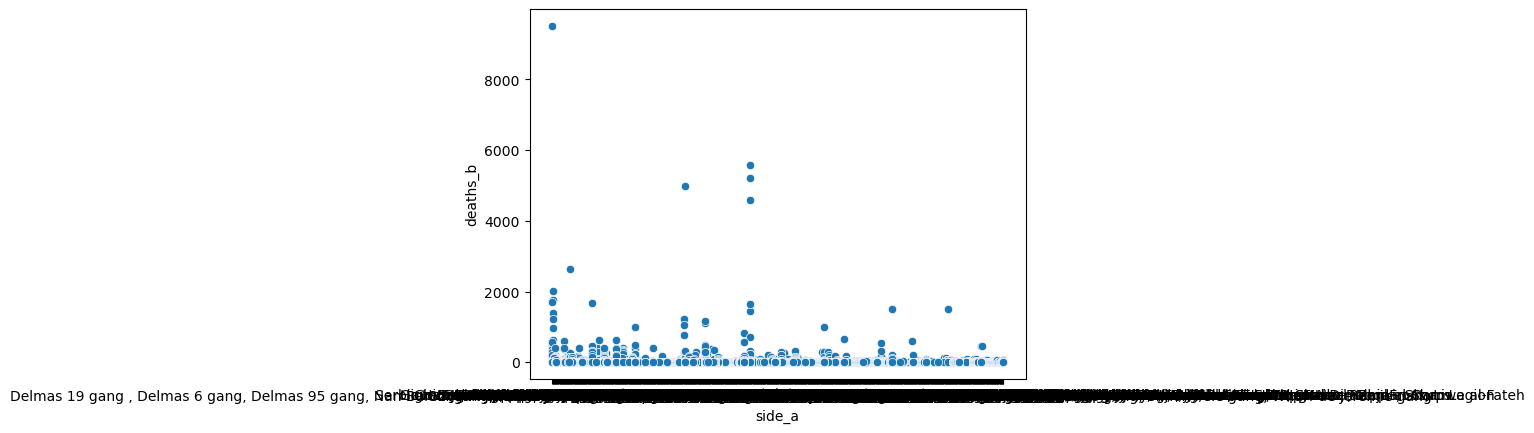

In [12]:
# make sns scatter plot of year and deaths_b
sns.scatterplot(x='side_a', y='deaths_b', data=data)



In [13]:
#groupby country and sum deaths_b
grouped = data.groupby('country')['deaths_b'].sum()
grouped


country
Afghanistan                        182674
Albania                                 4
Algeria                             15065
Angola                               7677
Argentina                               0
Armenia                                60
Australia                               1
Austria                                 0
Azerbaijan                           5317
Bahrain                                 0
Bangladesh                            375
Belgium                                 3
Benin                                   0
Bhutan                                  0
Bolivia                                27
Bosnia-Herzegovina                  10512
Botswana                                0
Brazil                                234
Burkina Faso                         1122
Burundi                              5559
Cambodia (Kampuchea)                  691
Cameroon                             3084
Canada                                 17
Central African Republic  

In [15]:
# group by country and years and sum deaths_b
grouped_year = data.groupby(['country', 'year'])['deaths_b'].sum().sort_values(ascending=False)
grouped_year.head(20)


country      year
Afghanistan  2021    30824
Syria        2014    28609
Afghanistan  2019    23815
Syria        2013    20437
             2015    20331
Afghanistan  2018    19877
Syria        2016    18424
Afghanistan  2017    16238
             2016    14537
             2020    13345
             2015    12048
Iraq         1991    10513
Syria        2017    10487
             2012     8882
Iraq         2014     7760
             2015     7595
Sri Lanka    2008     7148
Afghanistan  2014     6884
Syria        2018     6229
Sri Lanka    1991     5302
Name: deaths_b, dtype: int64